In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df=pd.read_csv("D:\Datasets for Practice\drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [54]:
df.shape

(200, 6)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [57]:
print(df['Sex'].unique())
print(df['BP'].value_counts())
print(df['Cholesterol'].unique())


['F' 'M']
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
['HIGH' 'NORMAL']


In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Cholesterol']=le.fit_transform(df['Cholesterol'])

In [59]:
print(df['Sex'].unique())
print("*******")
print(df['Cholesterol'].unique())

[0 1]
*******
[0 1]


In [60]:
df=pd.get_dummies(df,columns=['BP'],drop_first=True)
df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL
0,23,0,0,25.355,DrugY,False,False
1,47,1,0,13.093,drugC,True,False
2,47,1,0,10.114,drugC,True,False
3,28,0,0,7.798,drugX,False,True
4,61,0,0,18.043,DrugY,True,False


In [61]:
df.replace({True:1,False:0})
df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL
0,23,0,0,25.355,DrugY,False,False
1,47,1,0,13.093,drugC,True,False
2,47,1,0,10.114,drugC,True,False
3,28,0,0,7.798,drugX,False,True
4,61,0,0,18.043,DrugY,True,False


In [62]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [64]:
df['Drug']=le.fit_transform(df['Drug'])

In [65]:
df['Drug'].unique()

array([0, 3, 4, 1, 2])

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


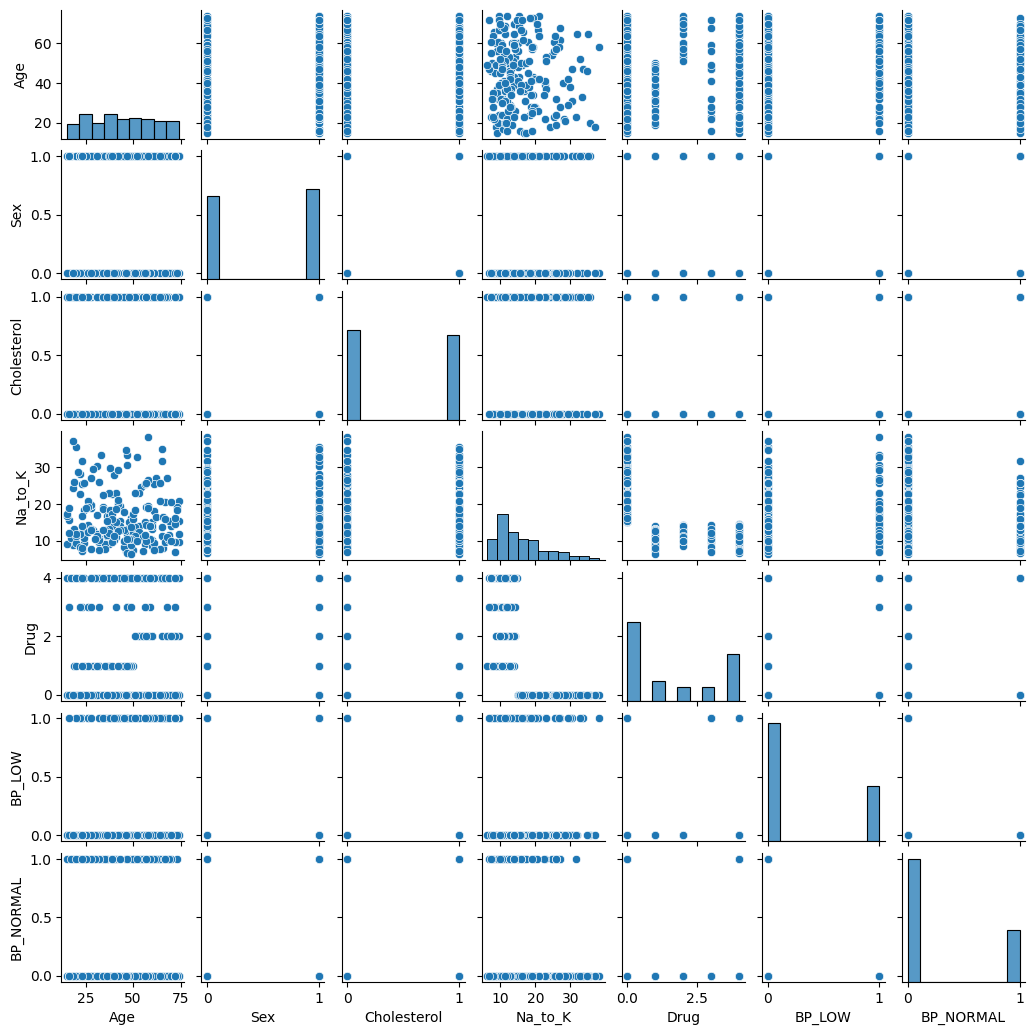

In [67]:
sns.pairplot(df,height=1.5)

In [69]:
#plt.figure(figsize=(15,10))
#sns.heatmap(df,annot=True,cmap='mako')

In [70]:
df.corr()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL
Age,1.000000,0.102027,-0.068234,-0.063119,0.041856,0.112909,-0.009025
Sex,0.102027,1.000000,-0.008811,-0.125008,0.018239,0.058356,-0.036868
Cholesterol,-0.068234,-0.008811,1.000000,0.010000,0.048415,0.042036,-0.145118
Na_to_K,-0.063119,-0.125008,0.010000,1.000000,-0.689051,0.043345,-0.156355
Drug,0.041856,0.018239,0.048415,-0.689051,1.000000,0.112195,0.319533
BP_LOW,0.112909,0.058356,0.042036,0.043345,0.112195,1.000000,-0.443749
BP_NORMAL,-0.009025,-0.036868,-0.145118,-0.156355,0.319533,-0.443749,1.000000


In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [82]:
X=df.drop('Drug',axis=1)
y=df['Drug']

In [83]:
X.head()

,Age,Sex,Cholesterol,Na_to_K,BP_LOW,BP_NORMAL
0,23,0,0,25.355,False,False
1,47,1,0,13.093,True,False
2,47,1,0,10.114,True,False
3,28,0,0,7.798,False,True
4,61,0,0,18.043,True,False


In [85]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [87]:
print(X_train.shape)
print(X_test.shape)

(160, 6)
(40, 6)


In [99]:
model=SVC(C=.1,kernel="linear",gamma=1)
model.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [100]:
prediction=model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.95
0.925


In [101]:
print("Confusion matrix:\n",confusion_matrix(prediction,y_test))

Confusion matrix:
 [[15  0  0  2  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0  9]]


In [102]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         4
           4       1.00      0.90      0.95        10

    accuracy                           0.93        40
   macro avg       0.92      0.96      0.93        40
weighted avg       0.94      0.93      0.93        40



In [93]:
#accuracy_score(prediction,y_test)

0.925

In [94]:
model=SVC(kernel="rbf")
model.fit(X_train,y_train)

SVC()

In [95]:
prediction=model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.95625
0.875


In [96]:
model=SVC(kernel="poly")
model.fit(X_train,y_train)

SVC(kernel='poly')

In [97]:
prediction=model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.925
0.8
